In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits 
digits = load_digits()
X = digits['data']
y = digits['target']
data = pd.DataFrame(data = np.c_[X, y])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [13]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

clf = DecisionTreeClassifier(random_state=0)

mean_cross_val_dtc = cross_val_score(clf, X, y, cv=10).mean()
print(mean_cross_val_dtc)

def write_answer_1(k_1):
    answers = [k_1]
    with open("1.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))

write_answer_1(mean_cross_val_dtc)

0.8303337234738853


In [14]:
#BaggingInitial

from sklearn.ensemble import BaggingClassifier

cart = DecisionTreeClassifier(random_state=0)
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)
mean_cross_val_bc = cross_val_score(model, X, y, cv=10).mean()
print(mean_cross_val_bc)

def write_answer_2(k_1):
    answers = [k_1]
    with open("2.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))

write_answer_2(mean_cross_val_bc)

0.9243136920825039


In [4]:
#BaggingSqrtFeatures

model_sqrt_d = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0, max_features=int(np.sqrt(X.shape[1])))
mean_cross_val_bc = cross_val_score(model_sqrt_d, X, y, cv=10).mean()
print(mean_cross_val_bc)

def write_answer_3(k_1):
    answers = [k_1]
    with open("3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))

write_answer_3(mean_cross_val_bc)

0.9365281294303756


In [17]:
#BaggingDecisionTreeSqrtFeatures

cart_sqrt_d = DecisionTreeClassifier(random_state=0, max_features=int(np.sqrt(X.shape[1])))
num_trees = 100
model = BaggingClassifier(base_estimator=cart_sqrt_d, n_estimators=num_trees, random_state=0)
mean_cross_val_bc = cross_val_score(model, X, y, cv=10).mean()
print(mean_cross_val_bc)

def write_answer_4(k_1):
    answers = [k_1]
    with open("4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))

write_answer_4(mean_cross_val_bc)

0.9544773623165452


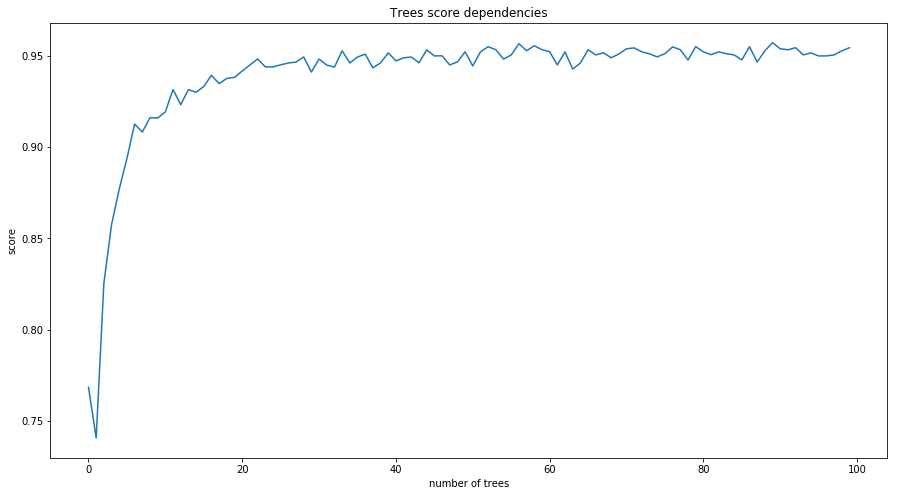

In [8]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#plot random forest classification relation to number of trees
def plot_rf_trees_score():
    trees = np.arange(100)
    results = []
    for tree in trees:
        model = RandomForestClassifier(n_estimators=tree+1)
        mean_cross_val_rfc = cross_val_score(model, X, y, cv=10).mean()
        results.append(mean_cross_val_rfc)
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("number of trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
    
plot_rf_trees_score()


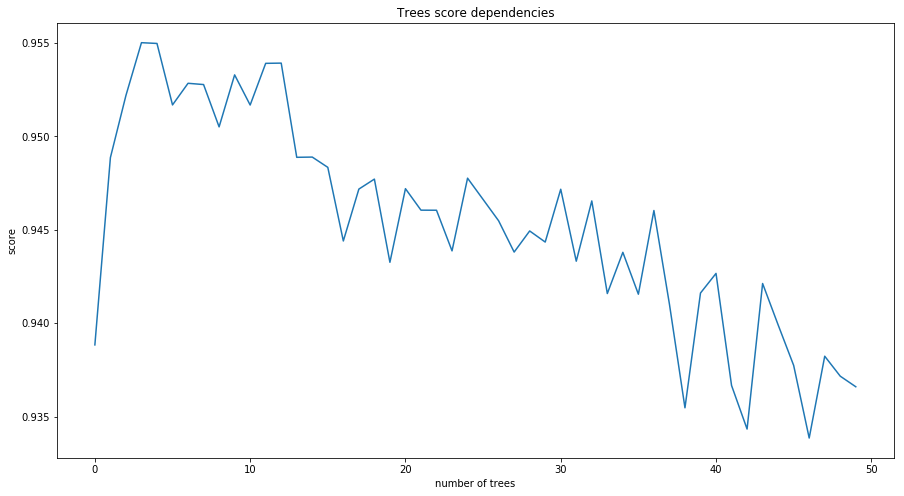

In [10]:
def plot_rf_features_score():
    features = np.arange(50)
    results = []
    for feature in features:
        model = RandomForestClassifier(n_estimators=100, max_features=feature+1)
        mean_cross_val_rfc = cross_val_score(model, X, y, cv=10).mean()
        results.append(mean_cross_val_rfc)
    plt.figure(figsize=(15, 8))
    plt.plot(features, results)
    plt.xlabel("number of features")
    plt.ylabel("score")
    plt.title("Features score dependencies")
    plt.show()
    
plot_rf_features_score()

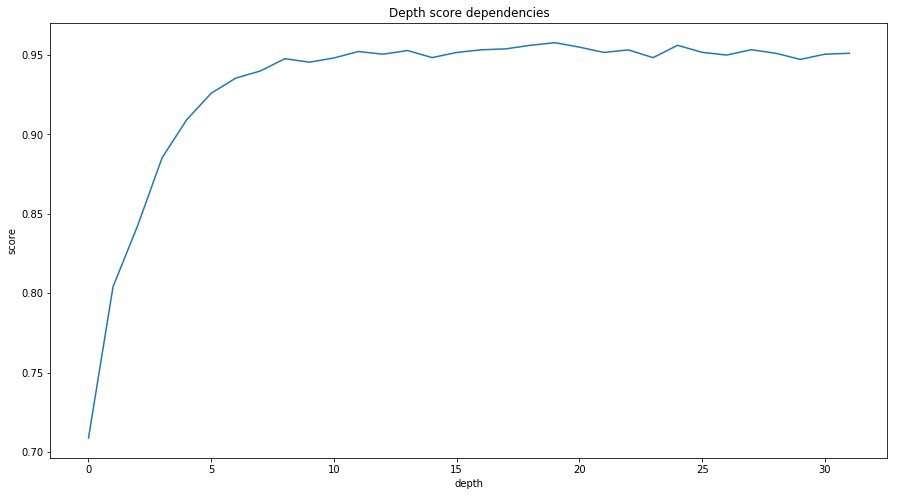

In [11]:
def plot_rf_depths_score():
    depths = np.arange(32)
    results = []
    for depth in depths:
        model = RandomForestClassifier(n_estimators=100, max_depth=depth+1)
        mean_cross_val_rfc = cross_val_score(model, X, y, cv=10).mean()
        results.append(mean_cross_val_rfc)
    plt.figure(figsize=(15, 8))
    plt.plot(depths, results)
    plt.xlabel("depth")
    plt.ylabel("score")
    plt.title("Depth score dependencies")
    plt.show()
    
plot_rf_depths_score()